In [2]:
from prophet import Prophet
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./data_daily_ts.csv')
data.head()

,date,quantity,price_total
0,2010-12-01,26754,58405.41
1,2010-12-02,31304,47725.88
2,2010-12-03,12546,44366.86
3,2010-12-04,0,0.00
4,2010-12-05,16451,31774.95


In [4]:
data.quantity.mean()

14085.168449197861

In [5]:
data.price_total.mean()

27486.018326203215

In [6]:
data.quantity.replace(0,14085.17, inplace=True)

In [7]:
data

,date,quantity,price_total
0,2010-12-01,26754.00,58405.41
1,2010-12-02,31304.00,47725.88
2,2010-12-03,12546.00,44366.86
3,2010-12-04,14085.17,0.00
4,2010-12-05,16451.00,31774.95
...,...,...,...
369,2011-12-05,43792.00,87787.26
370,2011-12-06,30133.00,56713.21
371,2011-12-07,37722.00,71582.27
372,2011-12-08,34293.00,81410.86


In [8]:
data.price_total.replace(0,27486.02, inplace=True)

In [9]:
data

,date,quantity,price_total
0,2010-12-01,26754.00,58405.41
1,2010-12-02,31304.00,47725.88
2,2010-12-03,12546.00,44366.86
3,2010-12-04,14085.17,27486.02
4,2010-12-05,16451.00,31774.95
...,...,...,...
369,2011-12-05,43792.00,87787.26
370,2011-12-06,30133.00,56713.21
371,2011-12-07,37722.00,71582.27
372,2011-12-08,34293.00,81410.86


In [10]:
quanitity_df = data.drop(columns=['price_total'])

In [11]:
price_total_df= data.drop(columns=['quantity'])

In [12]:
price_total_df

,date,price_total
0,2010-12-01,58405.41
1,2010-12-02,47725.88
2,2010-12-03,44366.86
3,2010-12-04,27486.02
4,2010-12-05,31774.95
...,...,...
369,2011-12-05,87787.26
370,2011-12-06,56713.21
371,2011-12-07,71582.27
372,2011-12-08,81410.86


# Fazendo a modelagem pelo preço

Feature engineering

In [13]:
prophet_df = price_total_df.rename(columns = {'date':'ds', 'price_total':'y'})

In [14]:
prophet_df

,ds,y
0,2010-12-01,58405.41
1,2010-12-02,47725.88
2,2010-12-03,44366.86
3,2010-12-04,27486.02
4,2010-12-05,31774.95
...,...,...
369,2011-12-05,87787.26
370,2011-12-06,56713.21
371,2011-12-07,71582.27
372,2011-12-08,81410.86


modelagem

In [15]:
model = Prophet()

In [16]:
model.add_country_holidays(country_name='BR')

In [17]:
model.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
future = model.make_future_dataframe(periods = 365)

In [19]:
forecast = model.predict(future)

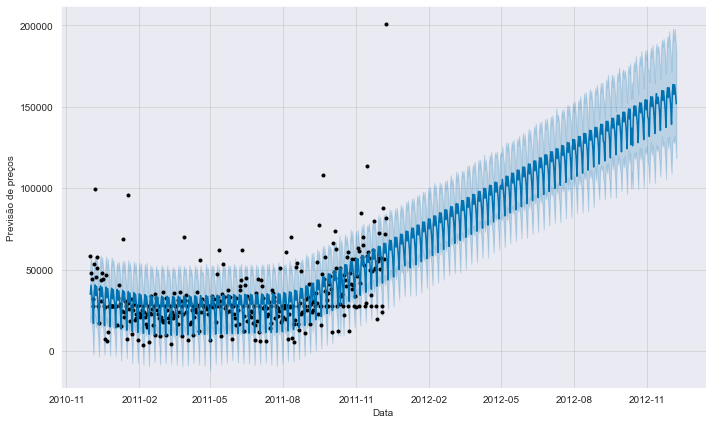

In [20]:
model.plot(forecast, xlabel='Data', ylabel='Previsão de preços');

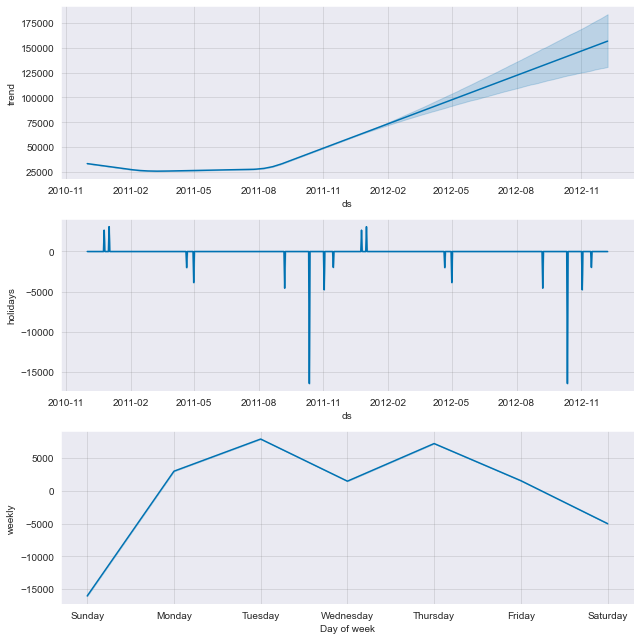

In [21]:
model.plot_components(forecast);

validação

In [37]:
from prophet.diagnostics import cross_validation
df_cv_p = cross_validation(model, horizon = '30 days')
df_cv_p.head()

INFO:prophet:Making 17 forecasts with cutoffs between 2011-03-14 00:00:00 and 2011-11-09 00:00:00


  0%|          | 0/17 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2011-03-15,30779.044069,17575.291046,45459.074475,20103.89,2011-03-14
1,2011-03-16,14275.404453,-158.472927,29221.747075,21948.36,2011-03-14
2,2011-03-17,16571.650004,2864.292842,31097.841716,35544.17,2011-03-14
3,2011-03-18,17233.417344,3231.212241,32428.523946,27428.08,2011-03-14
4,2011-03-19,15975.822524,1210.522683,30863.134457,27486.02,2011-03-14


In [38]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv_p)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,1.047225e+08,10233.401413,8154.652732,0.357677,0.266079,0.306673,0.843137
1,4 days,8.127479e+07,9015.253340,7208.783558,0.314900,0.258539,0.278791,0.901961
2,5 days,2.349022e+08,15326.519796,10030.341565,0.355696,0.276580,0.330601,0.803922
3,6 days,2.324468e+08,15246.206091,9723.812083,0.339392,0.268710,0.336519,0.803922
4,7 days,2.447800e+08,15645.448136,10189.146207,0.316362,0.252903,0.326587,0.725490


C:\Users\mathe\anaconda3\lib\site-packages\prophet\plot.py:539: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\mathe\anaconda3\lib\site-packages\prophet\plot.py:540: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


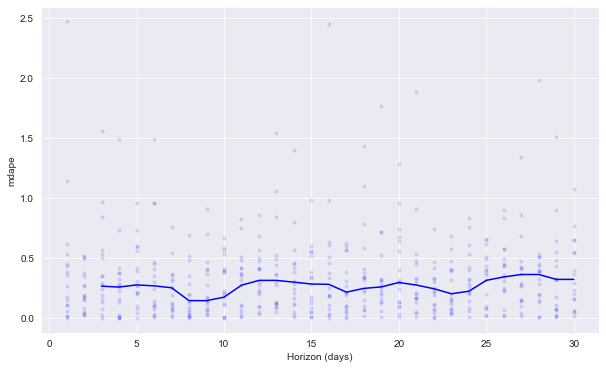

In [39]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv_p, metric='mdape');

C:\Users\mathe\anaconda3\lib\site-packages\prophet\plot.py:539: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\mathe\anaconda3\lib\site-packages\prophet\plot.py:540: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


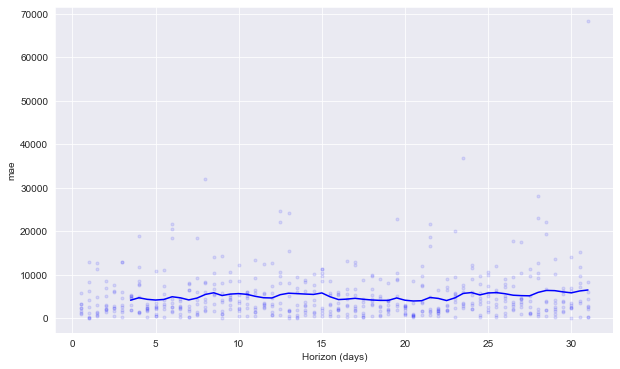

In [40]:
fig = plot_cross_validation_metric(df_cv_p, metric='mae')

Hyperparameters tunning

In [41]:
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(prophet_df)  # Fit model with given params
    df_cv = cross_validation(m, horizon='31 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 17 forecasts with cutoffs between 2011-03-05 00:00:00 and 2011-11-08 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x00000254AE1EF430>
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 17 forecasts with cutoffs between 2011-03-05 00:00:00 and 2011-11-08 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x00000254AC577E20>
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily

    changepoint_prior_scale  seasonality_prior_scale          rmse
0                     0.001                     0.01  21738.293233
1                     0.001                     0.10  23248.951455
2                     0.001                     1.00  21893.696933
3                     0.001                    10.00  21930.037787
4                     0.010                     0.01  18937.987140
5                     0.010                     0.10  18200.233187
6                     0.010                     1.00  18329.995010
7                     0.010                    10.00  18415.211835
8                     0.100                     0.01  15865.713721
9                     0.100                     0.10  15273.920012
10                    0.100                     1.00  15287.440407
11                    0.100                    10.00  15270.386073
12                    0.500                     0.01  15371.223527
13                    0.500                     0.10  14847.53

In [42]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10.0}


criamos o modelo passando os novos parametros, e treinamos os mesmo

## Model Quantity

In [26]:
quanitity_df

,date,quantity
0,2010-12-01,26754.00
1,2010-12-02,31304.00
2,2010-12-03,12546.00
3,2010-12-04,14085.17
4,2010-12-05,16451.00
...,...,...
369,2011-12-05,43792.00
370,2011-12-06,30133.00
371,2011-12-07,37722.00
372,2011-12-08,34293.00


Feature engineering

In [27]:
prophet_df_quant = quanitity_df.rename(columns = {'date':'ds', 'quantity':'y'})

modelagem

In [28]:
model_q = Prophet()
model_q.add_country_holidays(country_name='BR')
model_q.fit(prophet_df_quant)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
future = model_q.make_future_dataframe(periods = 365)
forecast = model_q.predict(future)

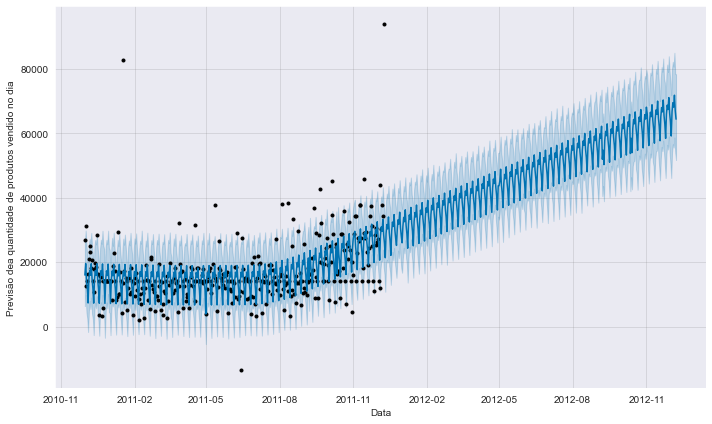

In [30]:
model_q.plot(forecast, xlabel='Data', ylabel='Previsão dea quantidade de produtos vendido no dia');

validacao

In [31]:
df_cv = cross_validation(model_q, horizon = '30 days')
df_cv.head()

INFO:prophet:Making 17 forecasts with cutoffs between 2011-03-14 00:00:00 and 2011-11-09 00:00:00


  0%|          | 0/17 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2011-03-15,16326.553060,6072.572976,26550.814285,7804.00,2011-03-14
1,2011-03-16,8225.410872,-1315.752774,18957.817487,12942.00,2011-03-14
2,2011-03-17,10740.905322,145.950231,20763.766832,19706.00,2011-03-14
3,2011-03-18,9031.785811,-1424.230526,19131.857127,13787.00,2011-03-14
4,2011-03-19,9406.406042,-863.490399,19642.804638,14085.17,2011-03-14


In [32]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,5.770712e+07,7596.520041,5239.542005,0.379176,0.252905,0.345159,0.882353
1,4 days,5.285507e+07,7270.149216,5017.220486,0.384020,0.257995,0.345953,0.941176
2,5 days,5.337888e+07,7306.084845,5635.715524,0.388102,0.356871,0.368312,0.901961
3,6 days,4.704247e+07,6858.751460,5088.648480,0.415215,0.332177,0.362245,0.882353
4,7 days,4.951357e+07,7036.588033,5061.143559,0.374554,0.277616,0.334605,0.843137


C:\Users\mathe\anaconda3\lib\site-packages\prophet\plot.py:539: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\mathe\anaconda3\lib\site-packages\prophet\plot.py:540: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


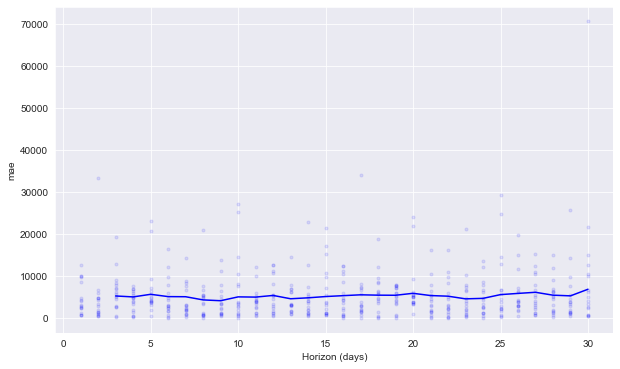

In [33]:
fig = plot_cross_validation_metric(df_cv, metric='mae')

C:\Users\mathe\anaconda3\lib\site-packages\prophet\plot.py:539: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\mathe\anaconda3\lib\site-packages\prophet\plot.py:540: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


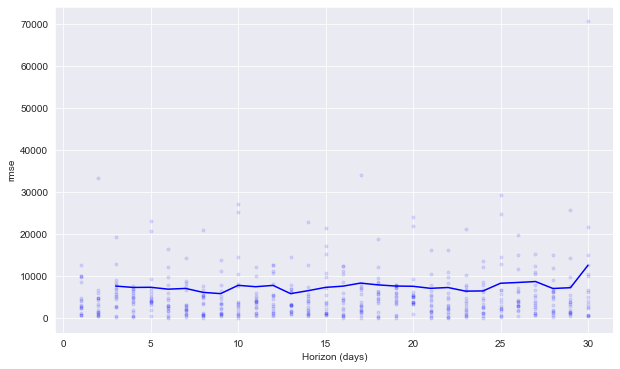

In [34]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')

Olhar outras variantes

hyperparametros

In [35]:


param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(prophet_df_quant)  # Fit model with given params
    df_cv = cross_validation(m, horizon='31 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 17 forecasts with cutoffs between 2011-03-05 00:00:00 and 2011-11-08 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x00000254AE25ED30>
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 17 forecasts with cutoffs between 2011-03-05 00:00:00 and 2011-11-08 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x00000254AD75B1C0>
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily

    changepoint_prior_scale  seasonality_prior_scale          rmse
0                     0.001                     0.01  12153.549354
1                     0.001                     0.10  12299.134940
2                     0.001                     1.00  11958.081157
3                     0.001                    10.00  12390.811246
4                     0.010                     0.01   8996.705094
5                     0.010                     0.10   8903.970275
6                     0.010                     1.00   8829.012649
7                     0.010                    10.00   8712.097162
8                     0.100                     0.01   7826.491857
9                     0.100                     0.10   7718.533379
10                    0.100                     1.00   7716.378301
11                    0.100                    10.00   7719.912224
12                    0.500                     0.01   7678.117184
13                    0.500                     0.10   7571.10

In [36]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 1.0}


Criamos o modelo passando os novos parametros, e treinamos os mesmo